Tasks:

1. Analyze sales trends over time (e.g., monthly or quarterly sales).
2. Identify the busiest days of the week for sales.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df1= pd.read_excel("C:/Users/prash/Desktop/data/online_retail_II.xlsx", sheet_name='Year 2009-2010')
df2= pd.read_excel('C:/Users/prash/Desktop/data/online_retail_II.xlsx', sheet_name='Year 2010-2011')
df = pd.concat([df1, df2], ignore_index=True)

# Data Cleaning- negative values to positive values
df['Quantity'] = df['Quantity'].abs()
df['Price'] = df['Price'].abs()

# Adding revenue column
df['TotalPrice'] = df['Quantity'] * df['Price']

# Removing bad data(not related to online retail sales)- got this data after doing product analysis
scanlist=['Manual','AMAZON FEE','DOTCOM POSTAGE','Adjust bad debt', 'POSTAGE']
df = df[~df['Description'].isin(scanlist)]

# Ensure the date column is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract year, month, quarter, week number, and day of the week
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Quarter'] = df['InvoiceDate'].dt.quarter
df['WeekNumber'] = df['InvoiceDate'].dt.isocalendar().week  # Week number
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()  # Day of the week as a string

In [25]:
monthly_sales=df.groupby(['Year', 'Month']).agg({'TotalPrice': 'sum'}).reset_index()
monthly_sales

,Year,Month,TotalPrice
0,2009,12,822484.050
1,2010,1,632908.422
2,2010,2,554538.336
3,2010,3,776819.581
4,2010,4,661925.822
5,2010,5,685131.380
6,2010,6,729518.520
7,2010,7,653964.350
8,2010,8,710103.320
9,2010,9,901000.071


In [26]:
monthly_sales['MonthName'] = pd.to_datetime(monthly_sales['Month'], format='%m').dt.month_name()
monthly_sales

,Year,Month,TotalPrice,MonthName
0,2009,12,822484.050,December
1,2010,1,632908.422,January
2,2010,2,554538.336,February
3,2010,3,776819.581,March
4,2010,4,661925.822,April
5,2010,5,685131.380,May
6,2010,6,729518.520,June
7,2010,7,653964.350,July
8,2010,8,710103.320,August
9,2010,9,901000.071,September


In [28]:
monthly_sales.drop(columns=['Month'], inplace=True)

In [29]:
monthly_sales=monthly_sales[1:][:]

In [31]:
monthly_sales.reset_index()
monthly_sales

,Year,TotalPrice,MonthName
1,2010,632908.422,January
2,2010,554538.336,February
3,2010,776819.581,March
4,2010,661925.822,April
5,2010,685131.380,May
6,2010,729518.520,June
7,2010,653964.350,July
8,2010,710103.320,August
9,2010,901000.071,September
10,2010,1127738.990,October


In [33]:
len(monthly_sales['Year'].unique())

2

In [34]:
for i in monthly_sales['Year'].unique():
    print(i)

2010
2011


In [35]:
range(len(monthly_sales['Year'].unique()))

range(0, 2)

C:\Users\prash\AppData\Local\Temp\ipykernel_15084\3698933064.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[a].set_xticklabels(monthly_sales['MonthName'], rotation=45)
C:\Users\prash\AppData\Local\Temp\ipykernel_15084\3698933064.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[a].set_xticklabels(monthly_sales['MonthName'], rotation=45)


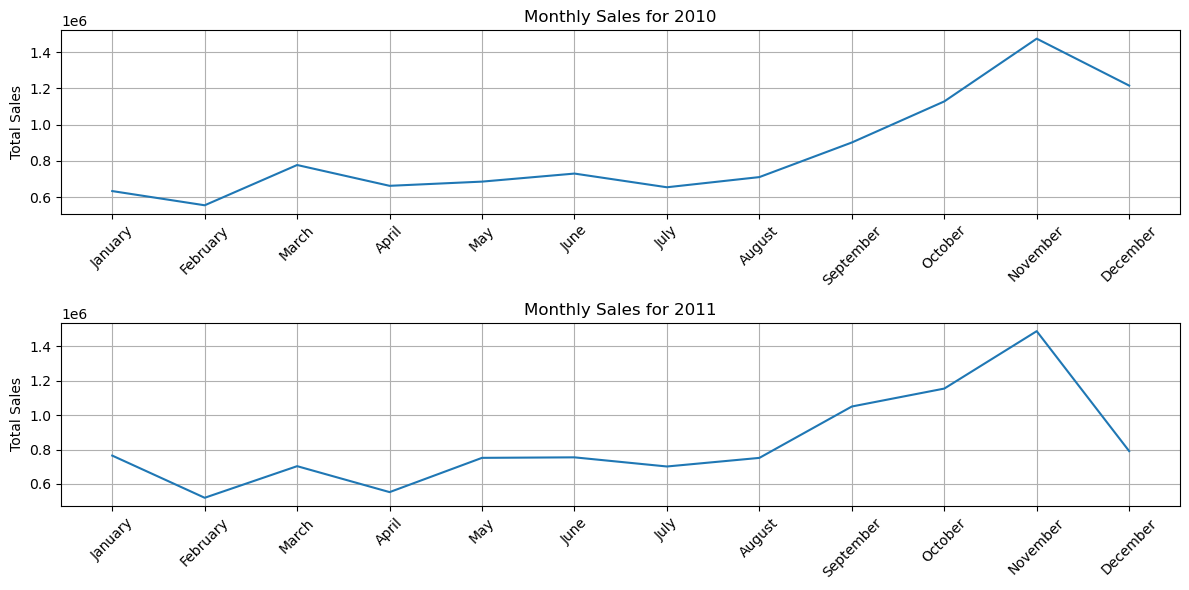

In [37]:
fig, axes = plt.subplots(len(monthly_sales['Year'].unique()), 1, figsize=(12, 6))

for a, i in enumerate(monthly_sales['Year'].unique()):
    sns.lineplot(data=monthly_sales[monthly_sales['Year'] == i], x='MonthName', y='TotalPrice', ax=axes[a])
    axes[a].set_title(f'Monthly Sales for {i}')
    axes[a].set_xlabel('')
    axes[a].set_ylabel('Total Sales')
    axes[a].set_xticklabels(monthly_sales['MonthName'], rotation=45)
    #axes[a].legend(title='Year', loc='upper left')
    axes[a].grid(True)

plt.tight_layout()
plt.show()


As can be seen from the above timeseries graph- sales pick up from september and peak at november in both years. This is probably due to the start of festive season and holidays.

In [27]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Year,Month,Quarter,WeekNumber,DayOfWeek
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009,12,4,49,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12,4,49,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12,4,49,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009,12,4,49,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009,12,4,49,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,4,49,Friday
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,4,49,Friday
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,4,49,Friday
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,4,49,Friday
